# Phase 1

1. Importing necessary libraries

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Loading the dataset

In [172]:
df = pd.read_csv('C:/Users/sunde/OneDrive/Desktop/bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Personal.Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [173]:
columns_list = df.columns.tolist()

print("Columns of the dataset:")
for column in columns_list:
    print(column)

Columns of the dataset:
ID
Age
Experience
Income
ZIP.Code
Family
CCAvg
Education
Mortgage
Securities.Account
CD.Account
Online
CreditCard
Personal.Loan


3. Visualizing the distributions of each input feature

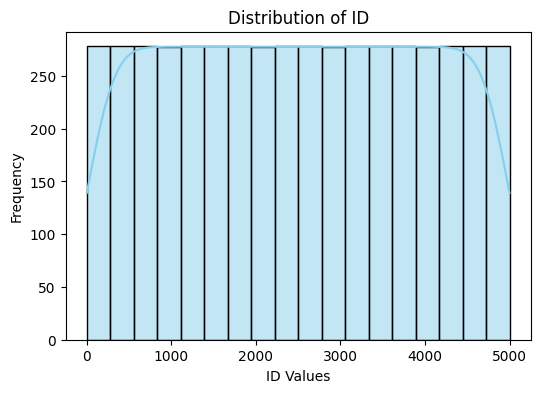

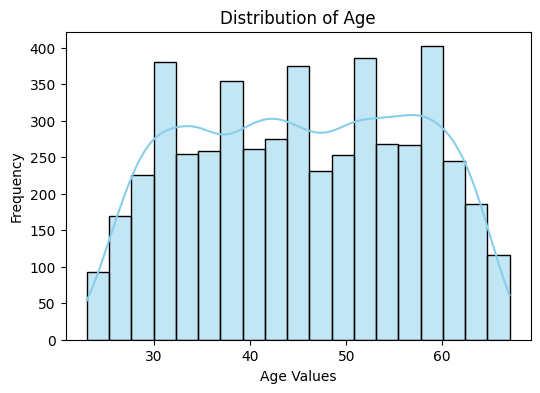

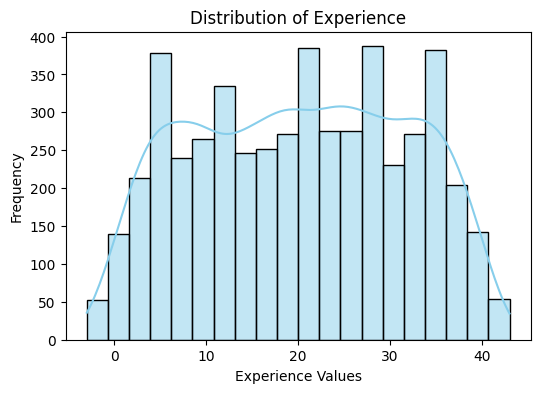

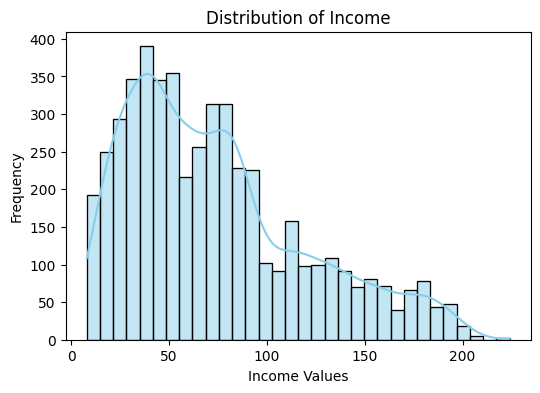

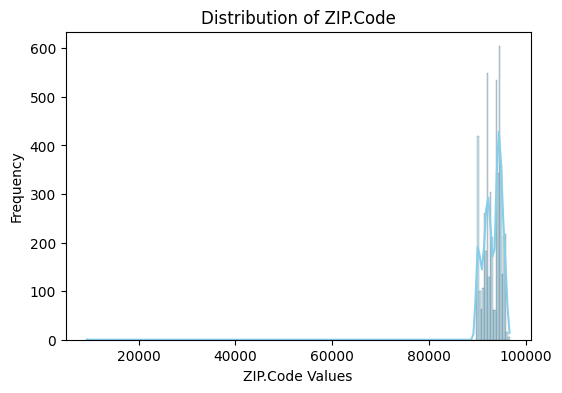

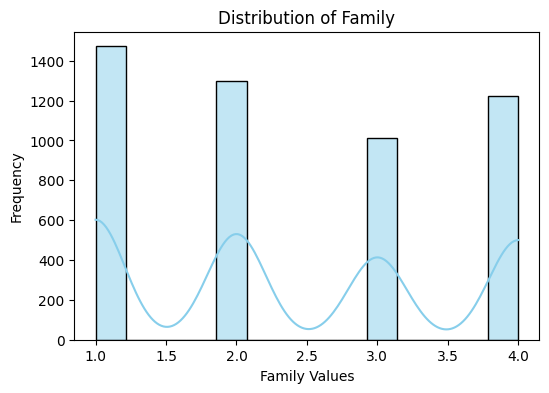

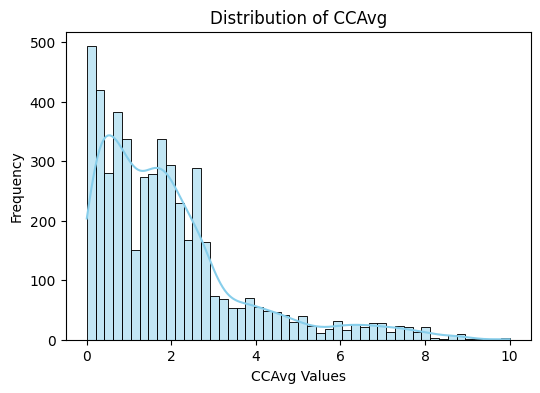

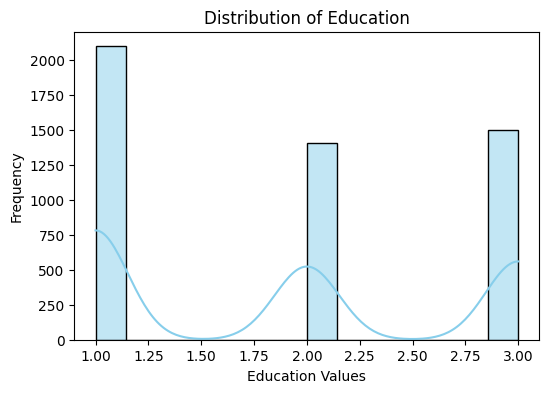

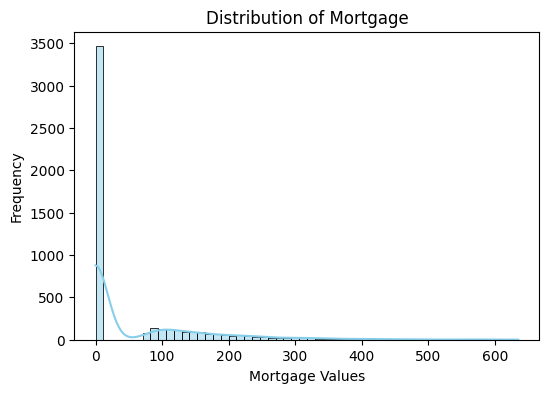

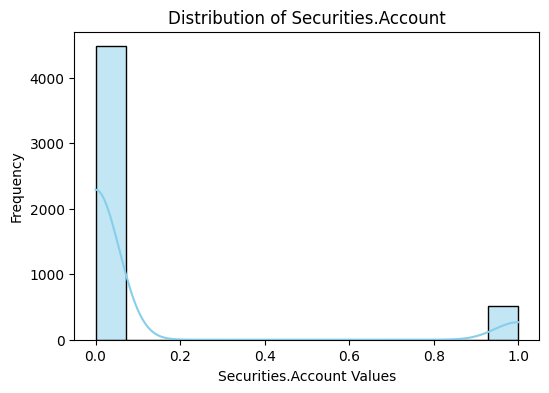

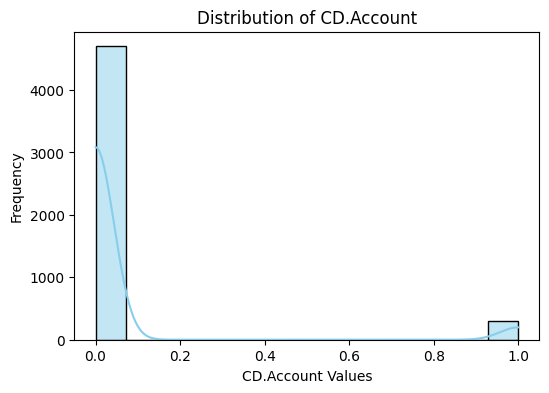

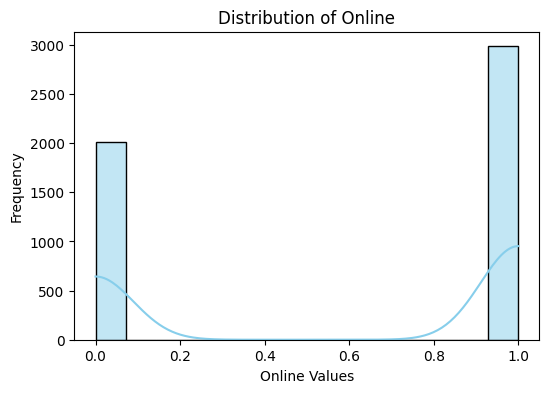

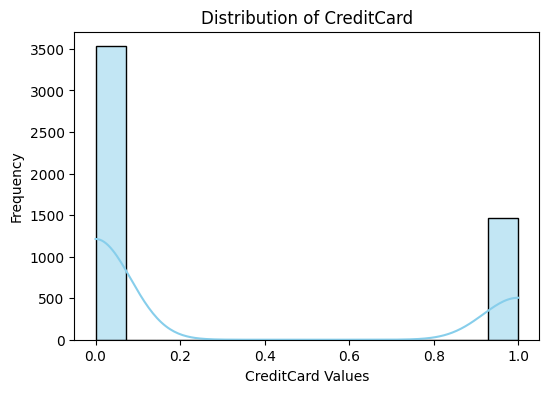

In [174]:

for column in df.columns[:-1]:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column} Values")
    plt.ylabel("Frequency")
    plt.show()


4. Discussing the distribution of output labels

In [175]:
output_label_distribution = df['Personal.Loan'].value_counts(normalize=True)
print("Output Label Distribution:")
print(output_label_distribution)

Output Label Distribution:
Personal.Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


5. Checking for data imbalance

In [176]:
if output_label_distribution.min() < 0.05 or output_label_distribution.max() > 0.95:
    print("Warning: The dataset may be imbalanced. Consider choosing a different dataset.")

6. Normalizing the data

In [177]:
df_normalized = (df.iloc[:, :-1] - df.iloc[:, :-1].min()) / (df.iloc[:, :-1].max() - df.iloc[:, :-1].min())
print(df_normalized)

          ID       Age  Experience    Income  ZIP.Code    Family  CCAvg  \
0     0.0000  0.045455    0.086957  0.189815  0.936527  1.000000   0.16   
1     0.0002  0.500000    0.478261  0.120370  0.924872  0.666667   0.15   
2     0.0004  0.363636    0.391304  0.013889  0.977892  0.000000   0.10   
3     0.0006  0.272727    0.260870  0.425926  0.970931  0.000000   0.27   
4     0.0008  0.272727    0.239130  0.171296  0.939080  1.000000   0.10   
...      ...       ...         ...       ...       ...       ...    ...   
4995  0.9992  0.136364    0.130435  0.148148  0.954731  0.000000   0.19   
4996  0.9994  0.159091    0.152174  0.032407  0.947174  1.000000   0.04   
4997  0.9996  0.909091    0.913043  0.074074  0.958463  0.333333   0.03   
4998  0.9998  0.954545    0.934783  0.189815  0.924242  0.666667   0.05   
4999  1.0000  0.113636    0.152174  0.347222  0.953758  0.666667   0.08   

      Education  Mortgage  Securities.Account  CD.Account  Online  CreditCard  
0           0.0  0.

7. Calculating descriptive statistics: Min, Max, Mean, Median

In [178]:
descriptive_stats = df.describe().transpose()[['min', 'max', 'mean', '50%']]

# Display the descriptive statistics
print("Descriptive Statistics for Input Features:")
print(descriptive_stats)

Descriptive Statistics for Input Features:
                       min      max          mean      50%
ID                     1.0   5000.0   2500.500000   2500.5
Age                   23.0     67.0     45.338400     45.0
Experience            -3.0     43.0     20.104600     20.0
Income                 8.0    224.0     73.774200     64.0
ZIP.Code            9307.0  96651.0  93152.503000  93437.0
Family                 1.0      4.0      2.396400      2.0
CCAvg                  0.0     10.0      1.937938      1.5
Education              1.0      3.0      1.881000      2.0
Mortgage               0.0    635.0     56.498800      0.0
Securities.Account     0.0      1.0      0.104400      0.0
CD.Account             0.0      1.0      0.060400      0.0
Online                 0.0      1.0      0.596800      1.0
CreditCard             0.0      1.0      0.294000      0.0
Personal.Loan          0.0      1.0      0.096000      0.0


# Phase 2

1. Importing necessary libraries

In [179]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2. Loading the dataset
<br> Assuming X_train, y_train as your features and labels

In [180]:
X_train = df.iloc[:, :-1]
y_train = df.iloc[:, -1]

3. Preprocessing the data
<br> Normalizing the features (standardization)

In [181]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_scaled = (X_train - mean) / std

4. Building and training a logistic regression model

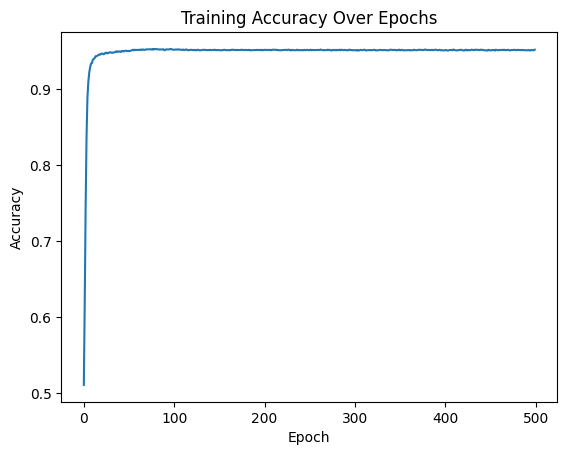

In [182]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train for a large number of epochs to observe overfitting
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, verbose=0)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


5. Checking for overfitting
<br> If accuracy plateaus, increase model complexity

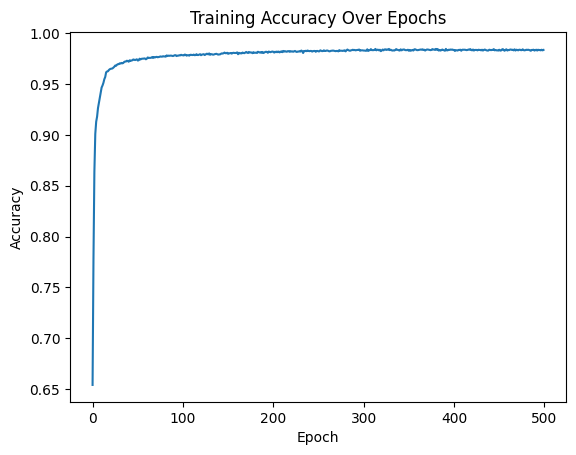

In [183]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(2, activation='relu'),  # Increase the number of neurons
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train again for a large number of epochs
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, verbose=0)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

6. Adding more layers and neurons until overfitting is observed

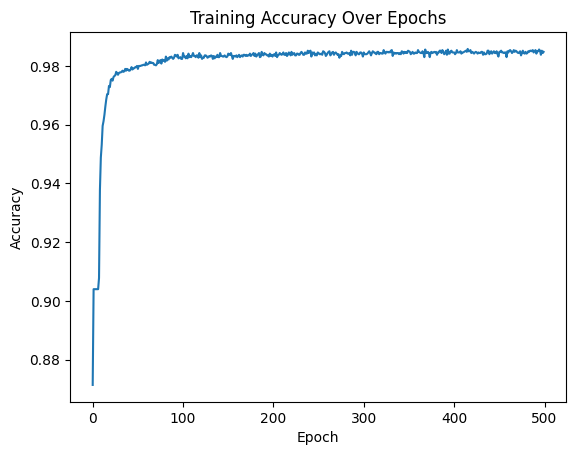

In [184]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train for a large number of epochs until overfitting is observed
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, verbose=0)

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Phase 3

1. Preprocessing the data
<br> Shuffling the rows

In [185]:
indices = tf.range(start=0, limit=tf.shape(X_train)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)
X_train = tf.gather(X_train, shuffled_indices)
y_train = tf.gather(y_train, shuffled_indices)

split_ratio = 0.8  
split_index = int(split_ratio * len(X_train))
X_train, X_val = X_train[:split_index], X_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

2. Building and training models with different architectures

In [186]:
import numpy as np

In [187]:
def build_model(architecture):
    model = keras.Sequential([
        layers.InputLayer(input_shape=(X_train.shape[1],)),
        layers.Dense(architecture[0], activation='relu')
    ])
    for neurons in architecture[1:]:
        model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [188]:
# Function to train and evaluate a model
def train_and_evaluate(model, epochs=100):
    checkpoint_filepath = 'model_checkpoint.keras'
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val),
                        callbacks=[model_checkpoint], verbose=0)

    # Load the best weights
    model.load_weights(checkpoint_filepath)

    # Evaluate on training set
    train_pred = (model.predict(X_train) > 0.5).astype("int32")
    train_accuracy = sum(train_pred == y_train.numpy()) / len(y_train)

    # Evaluate on validation set
    val_pred = (model.predict(X_val) > 0.5).astype("int32")
    val_accuracy = sum(val_pred == y_val.numpy()) / len(y_val)

    # Additional metrics (precision, recall, F1 score)
    true_positives = sum((val_pred == 1) & (y_val.numpy() == 1))
    false_positives = sum((val_pred == 1) & (y_val.numpy() == 0))
    false_negatives = sum((val_pred == 0) & (y_val.numpy() == 1))

    precision = true_positives / np.where((true_positives + false_positives) > 0, true_positives + false_positives, 1)
    recall = true_positives / np.where((true_positives + false_negatives) > 0, true_positives + false_negatives, 1)
    f1 = 2 * (precision * recall) / np.where((precision + recall) > 0, precision + recall, 1)
    
    return train_accuracy, val_accuracy, precision, recall, f1

In [189]:
architectures = [
    [64, 32, 16, 8, 1],
    [32, 16, 8, 1],
    [16, 8, 1],
    [8, 1],
    [4, 1],
    [2, 1]
]

In [196]:
results = []
for arch in architectures:
    model = build_model(arch)
    train_acc, val_acc, precision, recall, f1 = train_and_evaluate(model, epochs=150)
    results.append([f"Neural network model ({'-'.join(map(str, arch))})", train_acc, val_acc, precision, recall, f1])


32/32 [==============================] - 0s 2ms/step


3. Display the results in a table

In [208]:
print("Model\t\t\t\t\tAcc. on Training Set\tAcc. on Validation Set\t\tPrecision\tRecall\t\tF1 Score")
for result in results:
    precision = float(np.nanmean(result[3])) if isinstance(result[3], np.ndarray) else float(result[3])
    recall = float(np.nanmean(result[4])) if isinstance(result[4], np.ndarray) else float(result[4])
    f1 = float(np.nanmean(result[5])) if isinstance(result[5], np.ndarray) else float(result[5])
    print(f"{result[0]:<35} \t\t{float(result[1][0]):.4f}\t\t\t {float(result[2][0]):.4f}\t\t\t {precision:.4f}\t\t {recall:.4f}\t \t{f1:.4f}")


Model					Acc. on Training Set	Acc. on Validation Set		Precision	Recall		F1 Score
Neural network model (64-32-16-8-1) 		1.0000			 1.0000			 0.0000		 0.0000	 	0.0000
Neural network model (32-16-8-1)    		1.0000			 1.0000			 0.0000		 0.0000	 	0.0000
Neural network model (16-8-1)       		1.0000			 1.0000			 0.0000		 0.0000	 	0.0000
Neural network model (8-1)          		1.0000			 1.0000			 0.0000		 0.0000	 	0.0000
Neural network model (4-1)          		1.0000			 1.0000			 0.0000		 0.0000	 	0.0000
Neural network model (2-1)          		0.9992			 1.0000			 0.0000		 0.0000	 	0.0000


# Phase 4

1. Defining a simple neural network model


In [209]:
import warnings
from keras.models import save_model

In [210]:
def build_model(input_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_size,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

2. Training models with each individual feature


In [216]:
# Step 3: Train models with each individual feature
def train_feature_models(X_train, y_train):
    num_features = X_train.shape[1]
    accuracies = []

    for feature_idx in range(num_features):
        # Create a model with only one feature
        model = build_model(input_size=1)
        
        # Convert EagerTensor to NumPy array and reshape
        feature_data = np.array(X_train[:, feature_idx]).reshape(-1, 1)

        # Model Checkpointing
        checkpoint_filepath = f"model_checkpoint_feature_{feature_idx}"
        model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1, save_format='tf'
        )

        # Train the model
        history = model.fit(feature_data, y_train, epochs=50, validation_split=0.2, callbacks=[model_checkpoint])
        accuracies.append(max(history.history['val_accuracy']))

    return accuracies


3. Plot feature importance

In [236]:
def plot_feature_importance(accuracies):
    import matplotlib.pyplot as plt

    # Convert accuracies to percentages
    accuracies_percentage = [acc * 100 for acc in accuracies]

    plt.bar(range(1, len(accuracies_percentage) + 1), accuracies_percentage)
    plt.xticks(range(1, len(accuracies_percentage) + 1), [f"Feature {i+1}" for i in range(len(accuracies_percentage))], rotation=45, ha="right")
    plt.xlabel("Features")
    plt.ylabel("Validation Accuracy (%)")
    plt.title("Validation Accuracy for Each Individual Feature")
    plt.ylim(80, 100)
    plt.tight_layout()  # Adjust layout for better display
    plt.show()

4. Training models by removing less important features iteratively


In [218]:
def train_feature_reduced_models(X_train, y_train, feature_importance):
    num_features = X_train.shape[1]
    all_accuracies = []

    # Sort features based on importance
    sorted_features = np.argsort(feature_importance)

    # Original model accuracy
    original_model = build_model(input_size=num_features)
    original_model.fit(X_train, y_train, epochs=50, validation_split=0.2)
    original_accuracy = max(original_model.history.history['val_accuracy'])
    all_accuracies.append(original_accuracy)

    # Iteratively remove less important features
    for i in range(1, num_features):
        removed_features = sorted_features[:i]
        reduced_X_train = np.delete(X_train, removed_features, axis=1)

        # Create and train a reduced model
        reduced_model = build_model(input_size=reduced_X_train.shape[1])
        reduced_model.fit(reduced_X_train, y_train, epochs=50, validation_split=0.2)
        reduced_accuracy = max(reduced_model.history.history['val_accuracy'])
        all_accuracies.append(reduced_accuracy)

    return all_accuracies

5. Plot accuracy comparison between original and reduced models


In [240]:
""" def plot_reduced_models_accuracies(reduced_models_accuracies):
    if not isinstance(reduced_models_accuracies, (list, np.ndarray)):
        raise ValueError("Input should be a list or array of accuracies.")

    # Check for NaN or Inf values
    if np.isnan(reduced_models_accuracies).any() or np.isinf(reduced_models_accuracies).any():
        raise ValueError("Input contains NaN or Inf values.")

    # Plotting
    num_features = len(reduced_models_accuracies)
    plt.bar(range(1, num_features + 1), reduced_models_accuracies)
    plt.xlabel("Number of Features Removed")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy for Feature-Reduced Models")
    plt.ylim(80, 100)  # Limit y-axis to 80-100 for better visualization
    plt.show() """

def plot_reduced_models_accuracies(reduced_models_accuracies):
    import matplotlib.pyplot as plt

    # Convert accuracies to percentages
    accuracies_percentage = [acc * 100 for acc in reduced_models_accuracies]

    num_features = len(reduced_models_accuracies)
    plt.bar(range(1, num_features + 1), accuracies_percentage)
    plt.xlabel("Number of Features Removed")
    plt.ylabel("Validation Accuracy (%)")
    plt.title("Validation Accuracy for Feature-Reduced Models")
    plt.ylim(80, 100)  # Limit y-axis to 80-100 for better visualization
    plt.tight_layout()  # Adjust layout for better display
    plt.show()


6. Running the analysis


In [223]:
feature_importance = train_feature_models(X_train, y_train)
reduced_models_accuracies = train_feature_reduced_models(X_train, y_train, feature_importance)

Epoch 1/50
 95/100 [===========================>..] - ETA: 0s - loss: 115.6789 - accuracy: 0.6464
Epoch 1: val_accuracy improved from -inf to 0.90750, saving model to model_checkpoint_feature_0
INFO:tensorflow:Assets written to: model_checkpoint_feature_0\assets


INFO:tensorflow:Assets written to: model_checkpoint_feature_0\assets


100/100 [==============================] - 2s 12ms/step - loss: 110.2491 - accuracy: 0.6575 - val_loss: 3.0064 - val_accuracy: 0.9075
Epoch 2/50
 94/100 [===========================>..] - ETA: 0s - loss: 0.7809 - accuracy: 0.8690
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.7614 - accuracy: 0.8703 - val_loss: 0.5041 - val_accuracy: 0.9075
Epoch 3/50
 93/100 [==========================>...] - ETA: 0s - loss: 0.4222 - accuracy: 0.9022
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.9031 - val_loss: 0.3665 - val_accuracy: 0.9075
Epoch 4/50
 89/100 [=========================>....] - ETA: 0s - loss: 0.4667 - accuracy: 0.9041
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.5086 - accuracy: 0.8969 - val_loss: 0.3904 - val_accuracy: 0.9075
Epoch 5/50
 91/100 [============

INFO:tensorflow:Assets written to: model_checkpoint_feature_1\assets


100/100 [==============================] - 2s 12ms/step - loss: 0.9018 - accuracy: 0.7916 - val_loss: 0.3282 - val_accuracy: 0.9075
Epoch 2/50
 86/100 [========================>.....] - ETA: 0s - loss: 0.3320 - accuracy: 0.9033
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3298 - accuracy: 0.9034 - val_loss: 0.3219 - val_accuracy: 0.9075
Epoch 3/50
 82/100 [=======================>......] - ETA: 0s - loss: 0.3231 - accuracy: 0.9070
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.9034 - val_loss: 0.3258 - val_accuracy: 0.9075
Epoch 4/50
 93/100 [==========================>...] - ETA: 0s - loss: 0.3241 - accuracy: 0.9052
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.9034 - val_loss: 0.3223 - val_accuracy: 0.9075
Epoch 5/50
 85/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_2\assets


100/100 [==============================] - 2s 14ms/step - loss: 0.3794 - accuracy: 0.9034 - val_loss: 0.3623 - val_accuracy: 0.9075
Epoch 2/50
 99/100 [============================>.] - ETA: 0s - loss: 0.3541 - accuracy: 0.9034
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9034 - val_loss: 0.3398 - val_accuracy: 0.9075
Epoch 3/50
 99/100 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.9028
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.9034 - val_loss: 0.3247 - val_accuracy: 0.9075
Epoch 4/50
 94/100 [===========================>..] - ETA: 0s - loss: 0.3243 - accuracy: 0.9029
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.3238 - accuracy: 0.9034 - val_loss: 0.3153 - val_accuracy: 0.9075
Epoch 5/50
 93/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_3\assets


100/100 [==============================] - 2s 13ms/step - loss: 0.6826 - accuracy: 0.8850 - val_loss: 0.4780 - val_accuracy: 0.9075
Epoch 2/50
 86/100 [========================>.....] - ETA: 0s - loss: 0.4744 - accuracy: 0.9044
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.9034 - val_loss: 0.4252 - val_accuracy: 0.9075
Epoch 3/50
 79/100 [======================>.......] - ETA: 0s - loss: 0.4264 - accuracy: 0.9074
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.9034 - val_loss: 0.4290 - val_accuracy: 0.9075
Epoch 4/50
 86/100 [========================>.....] - ETA: 0s - loss: 0.3779 - accuracy: 0.9055
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.3781 - accuracy: 0.9034 - val_loss: 0.3414 - val_accuracy: 0.9075
Epoch 5/50
 86/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_3\assets


100/100 [==============================] - 1s 11ms/step - loss: 0.2938 - accuracy: 0.9003 - val_loss: 0.2870 - val_accuracy: 0.9137
Epoch 8/50
 85/100 [========================>.....] - ETA: 0s - loss: 0.2642 - accuracy: 0.9062
Epoch 8: val_accuracy did not improve from 0.91375
100/100 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.9028 - val_loss: 0.2468 - val_accuracy: 0.9075
Epoch 9/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.2628 - accuracy: 0.9045
Epoch 9: val_accuracy did not improve from 0.91375
100/100 [==============================] - 0s 3ms/step - loss: 0.2649 - accuracy: 0.9009 - val_loss: 0.2519 - val_accuracy: 0.9125
Epoch 10/50
 94/100 [===========================>..] - ETA: 0s - loss: 0.2340 - accuracy: 0.9062
Epoch 10: val_accuracy did not improve from 0.91375
100/100 [==============================] - 0s 4ms/step - loss: 0.2369 - accuracy: 0.9041 - val_loss: 0.2296 - val_accuracy: 0.9075
Epoch 11/50
 83/100 [===========

INFO:tensorflow:Assets written to: model_checkpoint_feature_3\assets


100/100 [==============================] - 1s 11ms/step - loss: 0.2008 - accuracy: 0.9009 - val_loss: 0.1993 - val_accuracy: 0.9150
Epoch 32/50
 90/100 [==========================>...] - ETA: 0s - loss: 0.2116 - accuracy: 0.9031
Epoch 32: val_accuracy did not improve from 0.91500
100/100 [==============================] - 0s 4ms/step - loss: 0.2087 - accuracy: 0.9044 - val_loss: 0.1988 - val_accuracy: 0.8975
Epoch 33/50
 83/100 [=======================>......] - ETA: 0s - loss: 0.1991 - accuracy: 0.9062
Epoch 33: val_accuracy did not improve from 0.91500
100/100 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9056 - val_loss: 0.1980 - val_accuracy: 0.9137
Epoch 34/50
 85/100 [========================>.....] - ETA: 0s - loss: 0.2107 - accuracy: 0.8989
Epoch 34: val_accuracy did not improve from 0.91500
100/100 [==============================] - 0s 4ms/step - loss: 0.2088 - accuracy: 0.8994 - val_loss: 0.1980 - val_accuracy: 0.9100
Epoch 35/50
 80/100 [=======

INFO:tensorflow:Assets written to: model_checkpoint_feature_4\assets


100/100 [==============================] - 2s 14ms/step - loss: 546.6320 - accuracy: 0.7991 - val_loss: 26.4666 - val_accuracy: 0.9075
Epoch 2/50
 99/100 [============================>.] - ETA: 0s - loss: 29.3658 - accuracy: 0.8220
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 5ms/step - loss: 29.1374 - accuracy: 0.8234 - val_loss: 21.6681 - val_accuracy: 0.9075
Epoch 3/50
 86/100 [========================>.....] - ETA: 0s - loss: 85.7050 - accuracy: 0.8169
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 84.1519 - accuracy: 0.8216 - val_loss: 4.3732 - val_accuracy: 0.9075
Epoch 4/50
100/100 [==============================] - ETA: 0s - loss: 30.3328 - accuracy: 0.8266
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 30.3328 - accuracy: 0.8266 - val_loss: 4.3036 - val_accuracy: 0.9075
Epoch 5/50
 91/100 [====

INFO:tensorflow:Assets written to: model_checkpoint_feature_5\assets


100/100 [==============================] - 2s 13ms/step - loss: 0.3803 - accuracy: 0.9034 - val_loss: 0.3606 - val_accuracy: 0.9075
Epoch 2/50
 85/100 [========================>.....] - ETA: 0s - loss: 0.3614 - accuracy: 0.9033
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.9034 - val_loss: 0.3504 - val_accuracy: 0.9075
Epoch 3/50
 79/100 [======================>.......] - ETA: 0s - loss: 0.3549 - accuracy: 0.9023
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.9034 - val_loss: 0.3380 - val_accuracy: 0.9075
Epoch 4/50
 81/100 [=======================>......] - ETA: 0s - loss: 0.3488 - accuracy: 0.9005
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.9034 - val_loss: 0.3282 - val_accuracy: 0.9075
Epoch 5/50
 99/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_6\assets


100/100 [==============================] - 2s 12ms/step - loss: 0.5443 - accuracy: 0.9034 - val_loss: 0.4840 - val_accuracy: 0.9075
Epoch 2/50
 93/100 [==========================>...] - ETA: 0s - loss: 0.4573 - accuracy: 0.9036
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.4545 - accuracy: 0.9034 - val_loss: 0.4142 - val_accuracy: 0.9075
Epoch 3/50
 99/100 [============================>.] - ETA: 0s - loss: 0.3851 - accuracy: 0.9031
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.9034 - val_loss: 0.3454 - val_accuracy: 0.9075
Epoch 4/50
 88/100 [=========================>....] - ETA: 0s - loss: 0.3269 - accuracy: 0.9041
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.9034 - val_loss: 0.2959 - val_accuracy: 0.9075
Epoch 5/50
 94/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_6\assets


100/100 [==============================] - 1s 11ms/step - loss: 0.2595 - accuracy: 0.8956 - val_loss: 0.2505 - val_accuracy: 0.9087
Epoch 46/50
100/100 [==============================] - ETA: 0s - loss: 0.2602 - accuracy: 0.8978
Epoch 46: val_accuracy did not improve from 0.90875
100/100 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8978 - val_loss: 0.2473 - val_accuracy: 0.8925
Epoch 47/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.2624 - accuracy: 0.8939
Epoch 47: val_accuracy did not improve from 0.90875
100/100 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.8947 - val_loss: 0.2473 - val_accuracy: 0.9050
Epoch 48/50
 86/100 [========================>.....] - ETA: 0s - loss: 0.2582 - accuracy: 0.8972
Epoch 48: val_accuracy did not improve from 0.90875
100/100 [==============================] - 0s 4ms/step - loss: 0.2595 - accuracy: 0.8969 - val_loss: 0.2468 - val_accuracy: 0.8963
Epoch 49/50
 86/100 [=======

INFO:tensorflow:Assets written to: model_checkpoint_feature_7\assets


100/100 [==============================] - 2s 11ms/step - loss: 0.4481 - accuracy: 0.9034 - val_loss: 0.3653 - val_accuracy: 0.9075
Epoch 2/50
 90/100 [==========================>...] - ETA: 0s - loss: 0.3689 - accuracy: 0.9014
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.3639 - accuracy: 0.9034 - val_loss: 0.3517 - val_accuracy: 0.9075
Epoch 3/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.3509 - accuracy: 0.9059
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.9034 - val_loss: 0.3433 - val_accuracy: 0.9075
Epoch 4/50
 93/100 [==========================>...] - ETA: 0s - loss: 0.3481 - accuracy: 0.9029
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3472 - accuracy: 0.9034 - val_loss: 0.3351 - val_accuracy: 0.9075
Epoch 5/50
 97/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_8\assets


100/100 [==============================] - 2s 12ms/step - loss: 0.6485 - accuracy: 0.8944 - val_loss: 0.5578 - val_accuracy: 0.9075
Epoch 2/50
 81/100 [=======================>......] - ETA: 0s - loss: 0.5305 - accuracy: 0.8989
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.8997 - val_loss: 0.5069 - val_accuracy: 0.9075
Epoch 3/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.4930 - accuracy: 0.8980
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.8984 - val_loss: 0.4492 - val_accuracy: 0.9075
Epoch 4/50
 94/100 [===========================>..] - ETA: 0s - loss: 0.4423 - accuracy: 0.8973
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8981 - val_loss: 0.3986 - val_accuracy: 0.9075
Epoch 5/50
 90/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_8\assets


100/100 [==============================] - 1s 10ms/step - loss: 0.3144 - accuracy: 0.9016 - val_loss: 0.2938 - val_accuracy: 0.9087
Epoch 29/50
 89/100 [=========================>....] - ETA: 0s - loss: 0.3252 - accuracy: 0.8964
Epoch 29: val_accuracy did not improve from 0.90875
100/100 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8991 - val_loss: 0.2965 - val_accuracy: 0.9025
Epoch 30/50
 89/100 [=========================>....] - ETA: 0s - loss: 0.3091 - accuracy: 0.9031
Epoch 30: val_accuracy did not improve from 0.90875
100/100 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.9022 - val_loss: 0.2925 - val_accuracy: 0.9025
Epoch 31/50
 82/100 [=======================>......] - ETA: 0s - loss: 0.3073 - accuracy: 0.9055
Epoch 31: val_accuracy did not improve from 0.90875
100/100 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.9006 - val_loss: 0.2978 - val_accuracy: 0.9062
Epoch 32/50
 80/100 [=======

INFO:tensorflow:Assets written to: model_checkpoint_feature_9\assets


100/100 [==============================] - 2s 13ms/step - loss: 0.6024 - accuracy: 0.8956 - val_loss: 0.5025 - val_accuracy: 0.9075
Epoch 2/50
 91/100 [==========================>...] - ETA: 0s - loss: 0.4282 - accuracy: 0.9028
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.9034 - val_loss: 0.3602 - val_accuracy: 0.9075
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.3388 - accuracy: 0.9034
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.9034 - val_loss: 0.3247 - val_accuracy: 0.9075
Epoch 4/50
 77/100 [======================>.......] - ETA: 0s - loss: 0.3256 - accuracy: 0.9034
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.9034 - val_loss: 0.3168 - val_accuracy: 0.9075
Epoch 5/50
 91/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_10\assets


100/100 [==============================] - 2s 11ms/step - loss: 0.6669 - accuracy: 0.8972 - val_loss: 0.6069 - val_accuracy: 0.9075
Epoch 2/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.4908 - accuracy: 0.9036
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.9034 - val_loss: 0.3760 - val_accuracy: 0.9075
Epoch 3/50
 90/100 [==========================>...] - ETA: 0s - loss: 0.3434 - accuracy: 0.9010
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.9034 - val_loss: 0.3006 - val_accuracy: 0.9075
Epoch 4/50
 80/100 [=======================>......] - ETA: 0s - loss: 0.2917 - accuracy: 0.9082
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.9034 - val_loss: 0.2823 - val_accuracy: 0.9075
Epoch 5/50
 82/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_11\assets


100/100 [==============================] - 2s 11ms/step - loss: 0.4981 - accuracy: 0.9034 - val_loss: 0.3872 - val_accuracy: 0.9075
Epoch 2/50
 93/100 [==========================>...] - ETA: 0s - loss: 0.3684 - accuracy: 0.9032
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.9034 - val_loss: 0.3419 - val_accuracy: 0.9075
Epoch 3/50
 94/100 [===========================>..] - ETA: 0s - loss: 0.3482 - accuracy: 0.9019
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.9034 - val_loss: 0.3285 - val_accuracy: 0.9075
Epoch 4/50
 87/100 [=========================>....] - ETA: 0s - loss: 0.3328 - accuracy: 0.9037
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.9034 - val_loss: 0.3199 - val_accuracy: 0.9075
Epoch 5/50
 81/100 [==============

INFO:tensorflow:Assets written to: model_checkpoint_feature_12\assets


100/100 [==============================] - 2s 10ms/step - loss: 0.5633 - accuracy: 0.9034 - val_loss: 0.4454 - val_accuracy: 0.9075
Epoch 2/50
 93/100 [==========================>...] - ETA: 0s - loss: 0.3993 - accuracy: 0.9046
Epoch 2: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3983 - accuracy: 0.9034 - val_loss: 0.3428 - val_accuracy: 0.9075
Epoch 3/50
 82/100 [=======================>......] - ETA: 0s - loss: 0.3487 - accuracy: 0.9024
Epoch 3: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.9034 - val_loss: 0.3177 - val_accuracy: 0.9075
Epoch 4/50
 80/100 [=======================>......] - ETA: 0s - loss: 0.3331 - accuracy: 0.9023
Epoch 4: val_accuracy did not improve from 0.90750
100/100 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.9034 - val_loss: 0.3105 - val_accuracy: 0.9075
Epoch 5/50
 77/100 [==============

7. Print the accuracies

Feature Importances:


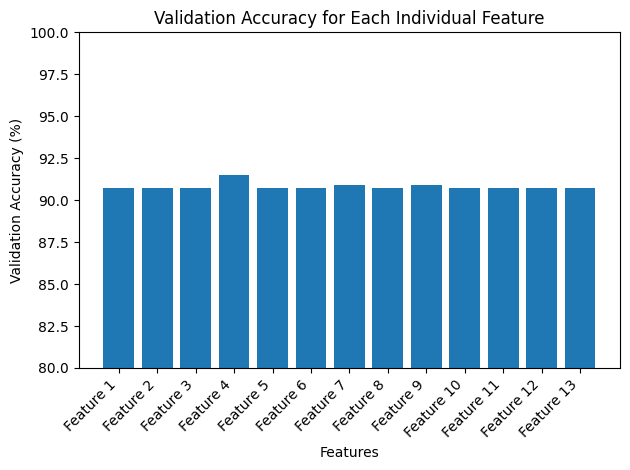

Accuracies for Feature-Reduced Models:


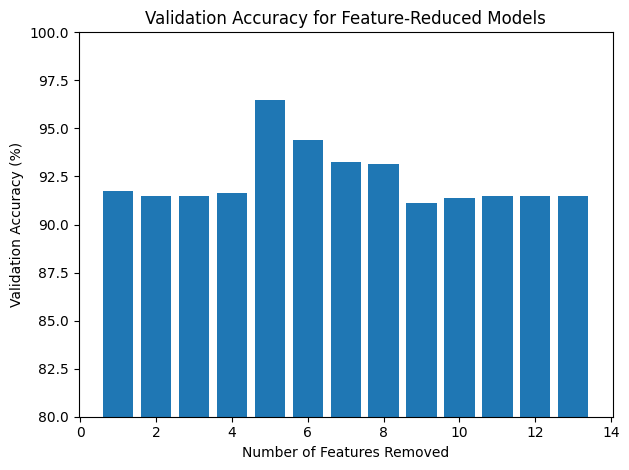

In [241]:
print("Feature Importances:")
plot_feature_importance(feature_importance)


print("Accuracies for Feature-Reduced Models:")
plot_reduced_models_accuracies(reduced_models_accuracies)